In [38]:
%matplotlib inline

In [39]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('QVI_data.csv')
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


## Data Cleaning

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [42]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [43]:
# make sure date is from July 2018 to June 2019
df[(df['DATE'] < '2018-07-01') & (df['DATE'] > '2019-06-30')]

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER


In [44]:
# create year-month column
df['YEARMONTH'] = df['DATE'].dt.strftime('%Y%m').astype('int')
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811


In [45]:
# check null values
df.isnull().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
YEARMONTH           0
dtype: int64

In [46]:
# Monthly total sales for each store
mthsales = df.groupby(['STORE_NBR','YEARMONTH']).TOT_SALES.sum()
sales_df = pd.DataFrame(data=mthsales)
sales_df.rename(columns={'TOT_SALES':'totalSales'}, inplace=True)
sales_df

totalSales
STORE_NBR YEARMONTH            
1         201807          206.9
          201808          176.1
          201809          278.8
          201810          188.1
          201811          192.6
...                         ...
272       201902          395.5
          201903          442.3
          201904          445.1
          201905          314.6
          201906          312.1

[3169 rows x 1 columns]

In [47]:
# monthly total number of customers for each store
mthcustomers = df.groupby(['STORE_NBR','YEARMONTH']).LYLTY_CARD_NBR.nunique()
customers_df = pd.DataFrame(data=mthcustomers)
customers_df.rename(columns={'LYLTY_CARD_NBR':'nCustomers'}, inplace=True)
customers_df

nCustomers
STORE_NBR YEARMONTH            
1         201807             49
          201808             42
          201809             59
          201810             44
          201811             46
...                         ...
272       201902             45
          201903             50
          201904             54
          201905             34
          201906             34

[3169 rows x 1 columns]

In [48]:
# monthly transaction per customer
mthtranspercust = df.groupby(['STORE_NBR','YEARMONTH']).TXN_ID.nunique() / df.groupby(['STORE_NBR','YEARMONTH']).LYLTY_CARD_NBR.nunique()
transpercust_df = pd.DataFrame(data=mthtranspercust)
transpercust_df.rename(columns={0:'transPerUnit'}, inplace=True)
transpercust_df

transPerUnit
STORE_NBR YEARMONTH              
1         201807         1.061224
          201808         1.023810
          201809         1.050847
          201810         1.022727
          201811         1.021739
...                           ...
272       201902         1.066667
          201903         1.060000
          201904         1.018519
          201905         1.176471
          201906         1.088235

[3169 rows x 1 columns]

In [49]:
# monthly chips per transaction
mthchipspertrans = df.groupby(['STORE_NBR','YEARMONTH']).PROD_QTY.sum() / df.groupby(['STORE_NBR','YEARMONTH']).TXN_ID.nunique()
chipspertrans_df = pd.DataFrame(data=mthchipspertrans)
chipspertrans_df.rename(columns={0:'chipsPerTrans'}, inplace=True)
chipspertrans_df

chipsPerTrans
STORE_NBR YEARMONTH               
1         201807          1.192308
          201808          1.255814
          201809          1.209677
          201810          1.288889
          201811          1.212766
...                            ...
272       201902          1.895833
          201903          1.905660
          201904          1.909091
          201905          1.775000
          201906          1.891892

[3169 rows x 1 columns]

In [50]:
# monthly average price per unit
mthavepriceperunit = df.groupby(['STORE_NBR','YEARMONTH']).TOT_SALES.sum() / df.groupby(['STORE_NBR','YEARMONTH']).PROD_QTY.sum()
avepriceperunit_df = pd.DataFrame(data=mthavepriceperunit)
avepriceperunit_df.rename(columns={0:'avePricePerUnit'}, inplace=True)
avepriceperunit_df

avePricePerUnit
STORE_NBR YEARMONTH                 
1         201807            3.337097
          201808            3.261111
          201809            3.717333
          201810            3.243103
          201811            3.378947
...                              ...
272       201902            4.346154
          201903            4.379208
          201904            4.239048
          201905            4.430986
          201906            4.458571

[3169 rows x 1 columns]

In [51]:
df_list = [sales_df, customers_df, transpercust_df, chipspertrans_df, avepriceperunit_df]
monthly_df = pd.concat(df_list, axis=1)
monthly_df.reset_index(inplace=True)
monthly_df.head(10)

,STORE_NBR,YEARMONTH,totalSales,nCustomers,transPerUnit,chipsPerTrans,avePricePerUnit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
5,1,201812,189.6,42,1.119048,1.212766,3.326316
6,1,201901,154.8,35,1.028571,1.166667,3.685714
7,1,201902,225.4,52,1.057692,1.181818,3.467692
8,1,201903,192.9,45,1.088889,1.183673,3.325862
9,1,201904,192.9,42,1.023810,1.325581,3.384211


In [52]:
# pre trial period from 201807 to 201901
# trial period from 201902 to 201904
# post period from 201905 to 201906
def trialperiod(yearmonth):
    if yearmonth < 201902:
        return 'pre-trial'
    elif yearmonth > 201904:
        return 'post'
    else:
        return 'trial'

monthly_df['trialPeriod'] = monthly_df['YEARMONTH'].apply(lambda yearmonth: trialperiod(yearmonth))
monthly_df.head()

,STORE_NBR,YEARMONTH,totalSales,nCustomers,transPerUnit,chipsPerTrans,avePricePerUnit,trialPeriod
0,1,201807,206.9,49,1.061224,1.192308,3.337097,pre-trial
1,1,201808,176.1,42,1.023810,1.255814,3.261111,pre-trial
2,1,201809,278.8,59,1.050847,1.209677,3.717333,pre-trial
3,1,201810,188.1,44,1.022727,1.288889,3.243103,pre-trial
4,1,201811,192.6,46,1.021739,1.212766,3.378947,pre-trial


In [53]:
# add transaction month column (for graphing)
monthly_df['transactionMonth'] = pd.to_datetime(monthly_df['YEARMONTH'].astype(str), format='%Y%m')
monthly_df.head()

,STORE_NBR,YEARMONTH,totalSales,nCustomers,transPerUnit,chipsPerTrans,avePricePerUnit,trialPeriod,transactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,pre-trial,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,pre-trial,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,pre-trial,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,pre-trial,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,pre-trial,2018-11-01


In [54]:
pretrial = monthly_df.loc[monthly_df['trialPeriod'] == 'pre-trial']
pretrial.set_index(['STORE_NBR', 'YEARMONTH'], inplace=True)
pretrial.head(10)

totalSales  nCustomers  transPerUnit  chipsPerTrans  \
STORE_NBR YEARMONTH                                                        
1         201807          206.9          49      1.061224       1.192308   
          201808          176.1          42      1.023810       1.255814   
          201809          278.8          59      1.050847       1.209677   
          201810          188.1          44      1.022727       1.288889   
          201811          192.6          46      1.021739       1.212766   
          201812          189.6          42      1.119048       1.212766   
          201901          154.8          35      1.028571       1.166667   
2         201807          150.8          39      1.051282       1.121951   
          201808          193.8          39      1.102564       1.279070   
          201809          154.4          36      1.027778       1.108108   

                     avePricePerUnit trialPeriod transactionMonth  
STORE_NBR YEARMONTH                                                
1         201807            3.337097   pre-trial       2018-07-01  
          201808            3.261111   pre-trial       2018-08-01  
          201809            3.717333   pre-trial       2018-09-01  
          201810            3.243103   pre-trial       2018-10-01  
          201811            3.378947   pre-trial       2018-11-01  
          201812            3.326316   pre-trial       2018-12-01  
          201901            3.685714   pre-trial       2019-01-01  
2         201807            3.278261   pre-trial       2018-07-01  
          201808            3.523636   pre-trial       2018-08-01  
          201809            3.765854   pre-trial       2018-09-01

In [55]:
trial = monthly_df.loc[monthly_df['trialPeriod'] == 'trial']
trial.head()

,STORE_NBR,YEARMONTH,totalSales,nCustomers,transPerUnit,chipsPerTrans,avePricePerUnit,trialPeriod,transactionMonth
7,1,201902,225.4,52,1.057692,1.181818,3.467692,trial,2019-02-01
8,1,201903,192.9,45,1.088889,1.183673,3.325862,trial,2019-03-01
9,1,201904,192.9,42,1.023810,1.325581,3.384211,trial,2019-04-01
19,2,201902,139.4,29,1.103448,1.156250,3.767568,trial,2019-02-01
20,2,201903,192.1,43,1.069767,1.108696,3.766667,trial,2019-03-01


## Choosing Control Stores

In [56]:
def Correlation(store):
    a=[]
    metrix = pretrial[['totalSales','nCustomers']]
    for i in metrix.index:
        a.append(metrix.loc[store].corrwith(metrix.loc[i[0]]))
    output = pd.DataFrame(a)
    output.index = metrix.index
    output = output.drop_duplicates()
    output.reset_index(inplace=True)
    output.drop(['YEARMONTH'], axis=1, inplace=True)
    output.set_index('STORE_NBR', inplace=True)    

    output = output.abs()
    output['Magnitude'] = output.mean(axis=1)
    return output

In [57]:
corr77 = Correlation(77).sort_values(['Magnitude'], ascending=False).dropna()
corr77.head()

,totalSales,nCustomers,Magnitude
STORE_NBR,,,
77,1.000000,1.000000,1.000000
233,0.903774,0.990358,0.947066
119,0.867664,0.983267,0.925466
71,0.914106,0.754817,0.834461
3,0.806644,0.834207,0.820426


<AxesSubplot:ylabel='STORE_NBR'>

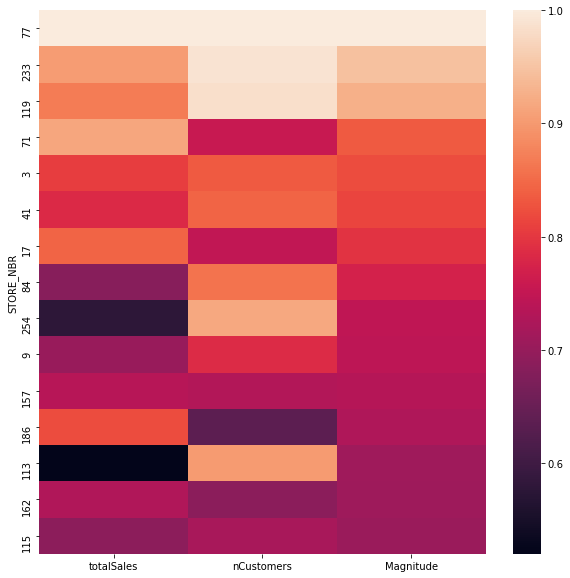

In [58]:
plt.figure(figsize=(10,10))
sb.heatmap(corr77[corr77['Magnitude'] > 0.7])

In [59]:
corr86 = Correlation(86).sort_values(['Magnitude'], ascending=False).dropna()
corr86.head()

,totalSales,nCustomers,Magnitude
STORE_NBR,,,
86,1.000000,1.000000,1.000000
155,0.877882,0.942876,0.910379
23,0.784698,0.943559,0.864128
120,0.872693,0.815097,0.843895
114,0.734415,0.855339,0.794877


<AxesSubplot:ylabel='STORE_NBR'>

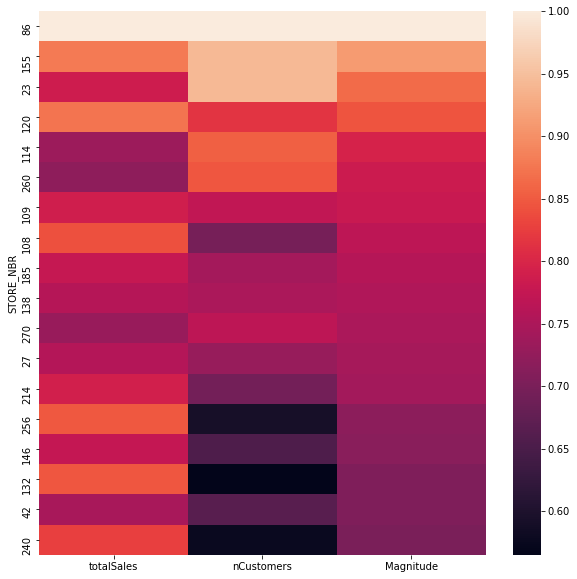

In [60]:
plt.figure(figsize=(10,10))
sb.heatmap(corr86[corr86['Magnitude'] > 0.7])

In [61]:
corr88 = Correlation(88).sort_values(['Magnitude'], ascending=False).dropna()
corr88.head()

,totalSales,nCustomers,Magnitude
STORE_NBR,,,
88,1.000000,1.000000,1.000000
178,0.731857,0.939466,0.835661
14,0.698557,0.942976,0.820767
133,0.735407,0.835426,0.785417
204,0.885774,0.550263,0.718018


<AxesSubplot:ylabel='STORE_NBR'>

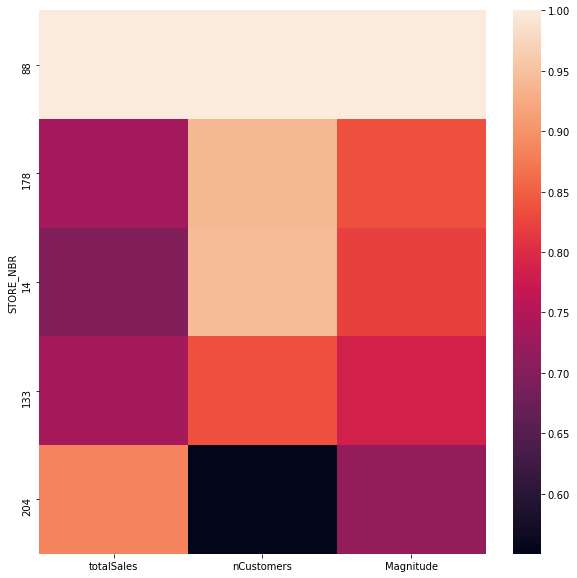

In [62]:
plt.figure(figsize=(10,10))
sb.heatmap(corr88[corr88['Magnitude'] > 0.7])

Choose control store based on the correlation with the trial store:
1. trial store 77: control store 233
2. trial store 86: control store 155
3. trial store 88: control store 178

## Compare the performance

In [63]:
pretrial.reset_index(inplace=True)

In [64]:
# create function to show trial and control's total monthly sales.
def compareSales(trialStore, controlStore):
    compareSales = pretrial

    trialStore_df = compareSales.loc[compareSales['STORE_NBR'] == trialStore]
    trialStore_df.drop(trialStore_df.columns[[0, 1, 3, 4, 5, 6, 7]], axis=1, inplace=True)
    trialStore_df.rename(columns={'totalSales': 'trialStore_Sales'}, inplace=True)

    controlStore_df = compareSales.loc[compareSales['STORE_NBR'] == controlStore]
    controlStore_df.drop(controlStore_df.columns[[0, 1, 3, 4, 5, 6, 7]], axis=1, inplace=True)
    controlStore_df.rename(columns={'totalSales': 'controlStore_Sales'}, inplace=True)

    output = trialStore_df.set_index('transactionMonth').join(controlStore_df.set_index('transactionMonth'))
    return output

In [68]:
# function for monthly number of customers
def compareCustomers(trialStore, controlStore):
    
    trialStore_df = pretrial.loc[pretrial['STORE_NBR'] == trialStore]
    trialStore_df.drop(trialStore_df.columns[[0, 1, 2, 4, 5, 6, 7]], axis=1, inplace=True)
    trialStore_df.rename(columns={'nCustomers': 'trialStore_Customers'}, inplace=True)

    controlStore_df = pretrial.loc[pretrial['STORE_NBR'] == controlStore]
    controlStore_df.drop(controlStore_df.columns[[0, 1, 2, 4, 5, 6, 7]], axis=1, inplace=True)
    controlStore_df.rename(columns={'nCustomers': 'controlStore_Customers'}, inplace=True)

    output = trialStore_df.set_index('transactionMonth').join(controlStore_df.set_index('transactionMonth'))
    return output

### Store 77 compare with Store 233

In [66]:
compareSales(77, 233)

C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,trialStore_Sales,controlStore_Sales
transactionMonth,,
2018-07-01,296.8,290.7
2018-08-01,255.5,285.9
2018-09-01,225.2,228.6
2018-10-01,204.5,185.7
2018-11-01,245.3,211.6
2018-12-01,267.3,279.8
2019-01-01,204.4,177.5


<AxesSubplot:xlabel='transactionMonth'>

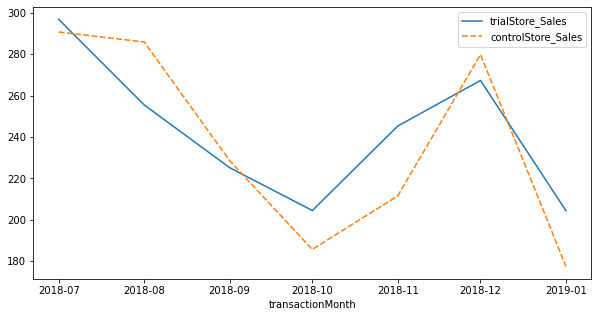

In [89]:
plt.figure(figsize=(10,5))
sb.lineplot(data=compareSales(77, 233))

In [69]:
compareCustomers(77, 233)

C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,trialStore_Customers,controlStore_Customers
transactionMonth,,
2018-07-01,51,51
2018-08-01,47,48
2018-09-01,42,42
2018-10-01,37,35
2018-11-01,41,40
2018-12-01,46,47
2019-01-01,35,35


C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<AxesSubplot:xlabel='transactionMonth'>

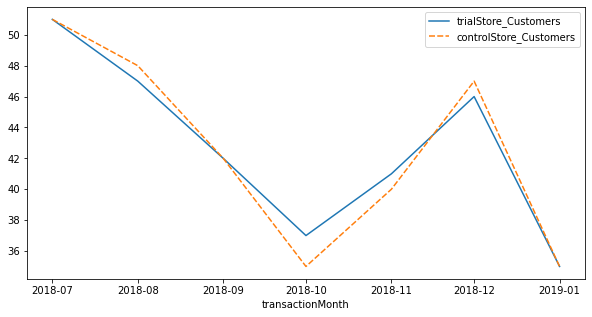

In [70]:
plt.figure(figsize=(10,5))
sb.lineplot(data=compareCustomers(77, 233))

### Store 86 compare with Store 155

In [71]:
compareSales(86,155)

C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,trialStore_Sales,controlStore_Sales
transactionMonth,,
2018-07-01,892.20,924.6
2018-08-01,764.05,782.7
2018-09-01,914.60,1014.4
2018-10-01,948.40,963.8
2018-11-01,918.00,898.8
2018-12-01,841.20,849.8
2019-01-01,841.40,874.6


C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<AxesSubplot:xlabel='transactionMonth'>

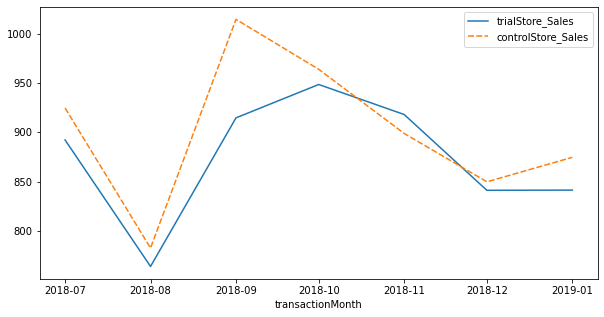

In [90]:
plt.figure(figsize=(10,5))
sb.lineplot(data=compareSales(86, 155))

In [91]:
compareCustomers(86, 155)

C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,trialStore_Customers,controlStore_Customers
transactionMonth,,
2018-07-01,99,101
2018-08-01,94,91
2018-09-01,103,103
2018-10-01,109,108
2018-11-01,100,101
2018-12-01,98,97
2019-01-01,94,96


C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<AxesSubplot:xlabel='transactionMonth'>

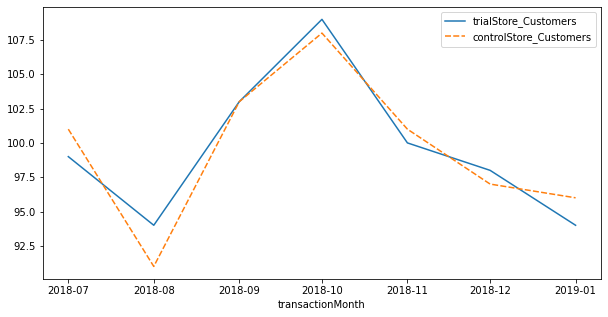

In [92]:
plt.figure(figsize=(10,5))
sb.lineplot(data=compareCustomers(86, 155))

### Store 88 compare with Store 178

In [97]:
compareSales(88,178)

C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,trialStore_Sales,controlStore_Sales
transactionMonth,,
2018-07-01,1310.0,952.0
2018-08-01,1323.8,915.5
2018-09-01,1423.0,954.4
2018-10-01,1352.4,962.6
2018-11-01,1382.8,975.6
2018-12-01,1325.2,947.2
2019-01-01,1266.4,837.2


C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<AxesSubplot:xlabel='transactionMonth'>

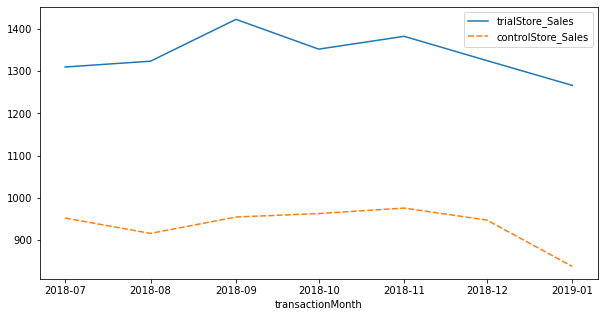

In [98]:
plt.figure(figsize=(10,5))
sb.lineplot(data=compareSales(88,178))

In [99]:
compareCustomers(88,178)

C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,trialStore_Customers,controlStore_Customers
transactionMonth,,
2018-07-01,129,107
2018-08-01,131,108
2018-09-01,124,101
2018-10-01,123,102
2018-11-01,130,111
2018-12-01,126,101
2019-01-01,117,95


C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<AxesSubplot:xlabel='transactionMonth'>

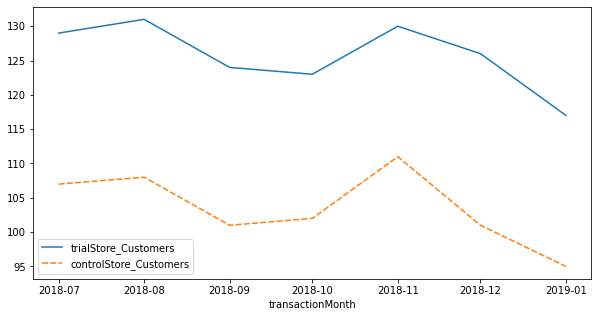

In [100]:
plt.figure(figsize=(10,5))
sb.lineplot(data=compareCustomers(88,178))

## Assessment of trial store 77

### Sales

In [72]:
from scipy.stats import t
from scipy.stats import ttest_ind
from statistics import stdev

In [73]:
# scale all control stores' performance to trial store.
# ratio = trialsales / control sales
def salesratio(trialstore, controlstore):
    salesratio = pretrial[pretrial['STORE_NBR'] == trialstore]['totalSales'].sum() / pretrial[pretrial['STORE_NBR'] == controlstore]['totalSales'].sum()
    return salesratio

In [74]:
# create a dataframe with scaled control sales, trial sales and percentage difference
def scaledsales(trialstore, controlstore):
    scaledcontrolsales = monthly_df.loc[monthly_df['STORE_NBR'] == controlstore]
    scaledcontrolsales['scaledControlSales'] = scaledcontrolsales['totalSales'] * salesratio(trialstore, controlstore)
    scaledcontrolsales.drop(scaledcontrolsales.columns[[0,2,3,4,5,6,7,8]], axis=1, inplace=True)

    trialsales = monthly_df.loc[monthly_df['STORE_NBR'] == trialstore]
    trialsales.drop(trialsales.columns[[0,3,4,5,6,8]], axis=1, inplace=True)
    trialsales.rename(columns={'totalSales': 'trialSales'}, inplace=True)

    output = scaledcontrolsales.set_index('YEARMONTH').join(trialsales.set_index('YEARMONTH'))
    output['percentageDiff'] = abs(output.scaledControlSales - output.trialSales) / output.scaledControlSales
    return output

In [75]:
scaledsales(77, 233)

<ipython-input-74-953e3a2abc30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledcontrolsales['scaledControlSales'] = scaledcontrolsales['totalSales'] * salesratio(trialstore, controlstore)
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,scaledControlSales,trialSales,trialPeriod,percentageDiff
YEARMONTH,,,,
201807,297.565550,296.8,pre-trial,0.002573
201808,292.652187,255.5,pre-trial,0.126950
201809,233.998916,225.2,pre-trial,0.037602
201810,190.085733,204.5,pre-trial,0.075830
201811,216.597421,245.3,pre-trial,0.132516
201812,286.408121,267.3,pre-trial,0.066716
201901,181.692071,204.4,pre-trial,0.124980
201902,249.762622,235.0,trial,0.059107
201903,203.802205,278.5,trial,0.366521


In [76]:
def tvaluesales(trialstore, controlstore):
    output = scaledsales(trialstore,controlstore).loc[scaledsales(trialstore,controlstore)['trialPeriod'] == 'trial']
    std = (scaledsales(trialstore,controlstore).loc[scaledsales(trialstore,controlstore)['trialPeriod'] == 'pre-trial', 'percentageDiff']).std()
    mean = (scaledsales(trialstore,controlstore).loc[scaledsales(trialstore,controlstore)['trialPeriod'] == 'pre-trial', 'percentageDiff']).mean()
    output['t-value'] = (output['percentageDiff'] - mean) / std
    return output

In [77]:
tvaluesales(77,233)

<ipython-input-74-953e3a2abc30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledcontrolsales['scaledControlSales'] = scaledcontrolsales['totalSales'] * salesratio(trialstore, controlstore)
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,scaledControlSales,trialSales,trialPeriod,percentageDiff,t-value
YEARMONTH,,,,,
201902,249.762622,235.0,trial,0.059107,-0.438867
201903,203.802205,278.5,trial,0.366521,5.716714
201904,162.345704,263.5,trial,0.623080,10.853971


In [104]:
# calculate critical value for 95% confidence interval
cv = t.ppf(0.95, df=7)

Let null hypothesis be there is no difference between control store and trial store in trial period.

The increase in sales in the trial store 77 in March and April is statistically greater than in the control store 233.

<ipython-input-74-953e3a2abc30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledcontrolsales['scaledControlSales'] = scaledcontrolsales['totalSales'] * salesratio(trialstore, controlstore)
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Text(0.5, 1.0, 'Trial Store 77and Control Store 233 (Total Sales)')

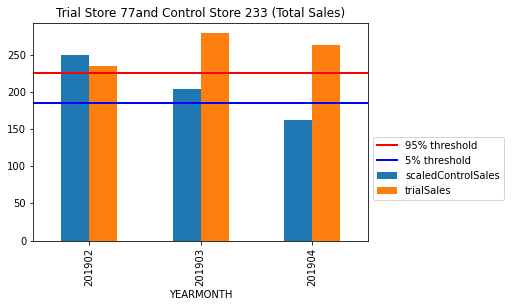

In [79]:
# plots
sales = scaledsales(77, 233).loc[scaledsales(77, 233)['trialPeriod'] == 'trial']
sales.drop(columns=['trialPeriod', 'percentageDiff'], inplace=True)
sales.plot.bar()

mean = (scaledsales(77,233).loc[scaledsales(77,233)['trialPeriod'] == 'trial', 'scaledControlSales']).mean()
std = (scaledsales(77,233).loc[scaledsales(77,233)['trialPeriod'] == 'pre-trial', 'percentageDiff']).std()
thresh95 = mean + (2 * mean * std)
thresh5 = mean - (2 * mean * std)

plt.axhline(y=thresh95, linewidth=2, color='r', label='95% threshold')
plt.axhline(y=thresh5, linewidth=2, color='b', label='5% threshold')
plt.legend(loc='best', bbox_to_anchor=(1.0,0.5))
plt.title('Trial Store ' +str(77) + 'and Control Store ' + str(233) + ' (Total Sales)')

Trial store 77 showed siginificant increase in total sales in March and April.

### Customers

In [80]:
# scale all control stores' performance to trial store.
# ratio = trial ncustomers / control ncustomers
def customersratio(trialstore, controlstore):
    customersratio = pretrial[pretrial['STORE_NBR'] == trialstore]['nCustomers'].sum() / pretrial[pretrial['STORE_NBR'] == controlstore]['nCustomers'].sum()
    return customersratio

In [81]:
customersratio(77,233)

1.0033557046979866

In [82]:
# create a dataframe with scaled control ncustomers, trial ncustomers and percentage difference
def scaledcustomers(trialstore, controlstore):
    scaledcontrolcustomers = monthly_df.loc[monthly_df['STORE_NBR'] == controlstore]
    scaledcontrolcustomers['scaledControl_nCustomers'] = scaledcontrolcustomers['nCustomers'] * customersratio(trialstore, controlstore)
    scaledcontrolcustomers.drop(scaledcontrolcustomers.columns[[0,2,3,4,5,6,7,8]], axis=1, inplace=True)

    trialcustomers = monthly_df.loc[monthly_df['STORE_NBR'] == trialstore]
    trialcustomers.drop(trialcustomers.columns[[0,2,4,5,6,8]], axis=1, inplace=True)
    trialcustomers.rename(columns={'nCustomers': 'trial_nCustomers'}, inplace=True)

    output = scaledcontrolcustomers.set_index('YEARMONTH').join(trialcustomers.set_index('YEARMONTH'))
    output['percentageDiff'] = abs(output.scaledControl_nCustomers - output.trial_nCustomers) / output.scaledControl_nCustomers
    return output

In [83]:
scaledcustomers(77,233)

<ipython-input-82-ffcfc78eba15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledcontrolcustomers['scaledControl_nCustomers'] = scaledcontrolcustomers['nCustomers'] * customersratio(trialstore, controlstore)


,scaledControl_nCustomers,trial_nCustomers,trialPeriod,percentageDiff
YEARMONTH,,,,
201807,51.171141,51,pre-trial,0.003344
201808,48.161074,47,pre-trial,0.024108
201809,42.140940,42,pre-trial,0.003344
201810,35.117450,37,pre-trial,0.053607
201811,40.134228,41,pre-trial,0.021572
201812,47.157718,46,pre-trial,0.024550
201901,35.117450,35,pre-trial,0.003344
201902,45.151007,45,trial,0.003344
201903,40.134228,50,trial,0.245819


In [84]:
def tvaluecustomers(trialstore, controlstore):
    output = scaledcustomers(trialstore,controlstore).loc[scaledcustomers(trialstore,controlstore)['trialPeriod'] == 'trial']
    std = (scaledcustomers(trialstore,controlstore).loc[scaledcustomers(trialstore,controlstore)['trialPeriod'] == 'pre-trial', 'percentageDiff']).std()
    mean = (scaledcustomers(trialstore,controlstore).loc[scaledcustomers(trialstore,controlstore)['trialPeriod'] == 'pre-trial', 'percentageDiff']).mean()
    output['t-value'] = (output['percentageDiff'] - mean) / std
    return output

In [85]:
tvaluecustomers(77,233)

<ipython-input-82-ffcfc78eba15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledcontrolcustomers['scaledControl_nCustomers'] = scaledcontrolcustomers['nCustomers'] * customersratio(trialstore, controlstore)
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

,scaledControl_nCustomers,trial_nCustomers,trialPeriod,percentageDiff,t-value
YEARMONTH,,,,,
201902,45.151007,45,trial,0.003344,-0.865091
201903,40.134228,50,trial,0.245819,12.427945
201904,30.100671,47,trial,0.561427,29.730282


In [86]:
t.ppf(0.95, df=7)

1.894578605061305

<ipython-input-82-ffcfc78eba15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledcontrolcustomers['scaledControl_nCustomers'] = scaledcontrolcustomers['nCustomers'] * customersratio(trialstore, controlstore)
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

Text(0.5, 1.0, 'Trial Store 77and Control Store 233 (Number of Customers)')

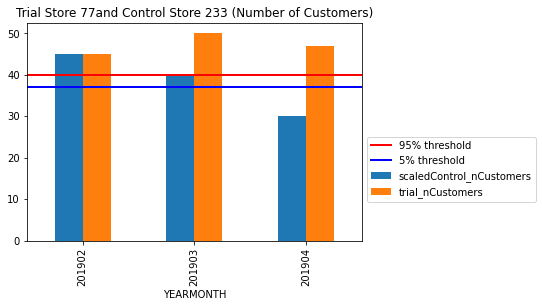

In [87]:
# plots
customers = scaledcustomers(77, 233).loc[scaledcustomers(77, 233)['trialPeriod'] == 'trial']
customers.drop(columns=['trialPeriod', 'percentageDiff'], inplace=True)
customers.plot.bar()

mean = (scaledcustomers(77,233).loc[scaledcustomers(77,233)['trialPeriod'] == 'trial', 'scaledControl_nCustomers']).mean()
std = (scaledcustomers(77,233).loc[scaledcustomers(77,233)['trialPeriod'] == 'pre-trial', 'percentageDiff']).std()
thresh95 = mean + (2 * mean * std)
thresh5 = mean - (2 * mean * std)

plt.axhline(y=thresh95, linewidth=2, color='r', label='95% threshold')
plt.axhline(y=thresh5, linewidth=2, color='b', label='5% threshold')
plt.legend(loc='best', bbox_to_anchor=(1.0,0.5))
plt.title('Trial Store ' +str(77) + 'and Control Store ' + str(233) + ' (Number of Customers)')

Trial store 77 showed siginificant increase in number of cutomers in March and April. This may be the reason why trial store 77 had siginificant increase in sales in this two months.

## Assessment of trial store 86

### Sales

In [101]:
salesratio(86, 155)

0.9700651481287743

In [102]:
scaledsales(86,155)

<ipython-input-74-953e3a2abc30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledcontrolsales['scaledControlSales'] = scaledcontrolsales['totalSales'] * salesratio(trialstore, controlstore)
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,scaledControlSales,trialSales,trialPeriod,percentageDiff
YEARMONTH,,,,
201807,896.922236,892.20,pre-trial,0.005265
201808,759.269991,764.05,pre-trial,0.006296
201809,984.034086,914.60,pre-trial,0.070561
201810,934.948790,948.40,pre-trial,0.014387
201811,871.894555,918.00,pre-trial,0.052880
201812,824.361363,841.20,pre-trial,0.020426
201901,848.418979,841.40,pre-trial,0.008273
201902,864.522060,913.20,trial,0.056306
201903,780.320405,1026.80,trial,0.315870


In [103]:
tvaluesales(86,155)

<ipython-input-74-953e3a2abc30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledcontrolsales['scaledControlSales'] = scaledcontrolsales['totalSales'] * salesratio(trialstore, controlstore)
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,scaledControlSales,trialSales,trialPeriod,percentageDiff,t-value
YEARMONTH,,,,,
201902,864.522060,913.2,trial,0.056306,1.194752
201903,780.320405,1026.8,trial,0.315870,11.242132
201904,819.317024,848.2,trial,0.035253,0.379790


In [105]:
cv

1.894578605061305

<ipython-input-74-953e3a2abc30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledcontrolsales['scaledControlSales'] = scaledcontrolsales['totalSales'] * salesratio(trialstore, controlstore)


Text(0.5, 1.0, 'Trial Store 86 and Control Store 155 (Total Sales)')

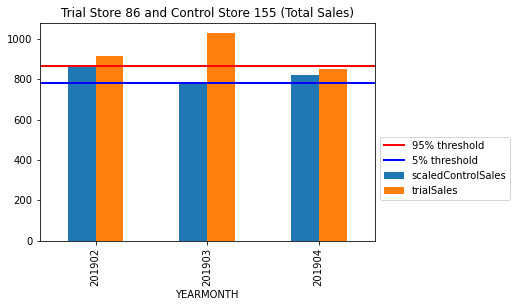

In [112]:
# plots
sales = scaledsales(86, 155).loc[scaledsales(86, 155)['trialPeriod'] == 'trial']
sales.drop(columns=['trialPeriod', 'percentageDiff'], inplace=True)
sales.plot.bar()

mean = (scaledsales(86,155).loc[scaledsales(86,155)['trialPeriod'] == 'trial', 'scaledControlSales']).mean()
std = (scaledsales(86,155).loc[scaledsales(86,155)['trialPeriod'] == 'pre-trial', 'percentageDiff']).std()
thresh95 = mean + (2 * mean * std)
thresh5 = mean - (2 * mean * std)

plt.axhline(y=thresh95, linewidth=2, color='r', label='95% threshold')
plt.axhline(y=thresh5, linewidth=2, color='b', label='5% threshold')
plt.legend(loc='best', bbox_to_anchor=(1.0,0.5))
plt.title('Trial Store 86 and Control Store 155 (Total Sales)')

Trial store 86 showed siginificant increase in total sales in March.

### Customers

In [107]:
customersratio(86,155)

1.0

In [108]:
scaledcustomers(86,155)

<ipython-input-82-ffcfc78eba15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledcontrolcustomers['scaledControl_nCustomers'] = scaledcontrolcustomers['nCustomers'] * customersratio(trialstore, controlstore)


,scaledControl_nCustomers,trial_nCustomers,trialPeriod,percentageDiff
YEARMONTH,,,,
201807,101.0,99,pre-trial,0.019802
201808,91.0,94,pre-trial,0.032967
201809,103.0,103,pre-trial,0.000000
201810,108.0,109,pre-trial,0.009259
201811,101.0,100,pre-trial,0.009901
201812,97.0,98,pre-trial,0.010309
201901,96.0,94,pre-trial,0.020833
201902,95.0,107,trial,0.126316
201903,94.0,115,trial,0.223404


In [109]:
tvaluecustomers(86,155)

<ipython-input-82-ffcfc78eba15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledcontrolcustomers['scaledControl_nCustomers'] = scaledcontrolcustomers['nCustomers'] * customersratio(trialstore, controlstore)
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

,scaledControl_nCustomers,trial_nCustomers,trialPeriod,percentageDiff,t-value
YEARMONTH,,,,,
201902,95.0,107,trial,0.126316,10.441339
201903,94.0,115,trial,0.223404,19.525687
201904,99.0,105,trial,0.060606,4.293029


<ipython-input-82-ffcfc78eba15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledcontrolcustomers['scaledControl_nCustomers'] = scaledcontrolcustomers['nCustomers'] * customersratio(trialstore, controlstore)


Text(0.5, 1.0, 'Trial Store 86and Control Store 155 (Number of Customers)')

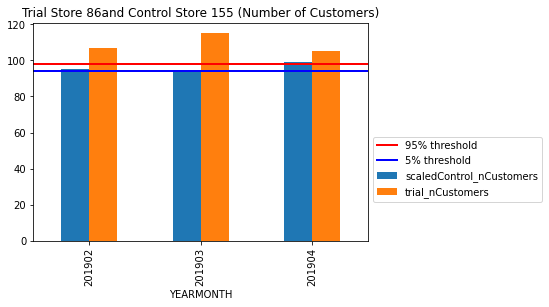

In [111]:
# plots
customers = scaledcustomers(86, 155).loc[scaledcustomers(86, 155)['trialPeriod'] == 'trial']
customers.drop(columns=['trialPeriod', 'percentageDiff'], inplace=True)
customers.plot.bar()

mean = (scaledcustomers(86,155).loc[scaledcustomers(86,155)['trialPeriod'] == 'trial', 'scaledControl_nCustomers']).mean()
std = (scaledcustomers(86,155).loc[scaledcustomers(86,155)['trialPeriod'] == 'pre-trial', 'percentageDiff']).std()
thresh95 = mean + (2 * mean * std)
thresh5 = mean - (2 * mean * std)

plt.axhline(y=thresh95, linewidth=2, color='r', label='95% threshold')
plt.axhline(y=thresh5, linewidth=2, color='b', label='5% threshold')
plt.legend(loc='best', bbox_to_anchor=(1.0,0.5))
plt.title('Trial Store ' +str(86) + 'and Control Store ' + str(155) + ' (Number of Customers)')

Trial store 86 showed siginificant increase in number of customers during whole trial period. However, only March has significant increase in sales.

## Assessment of trial store 88

### Sales

In [113]:
scaledsales(88,178)

<ipython-input-74-953e3a2abc30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledcontrolsales['scaledControlSales'] = scaledcontrolsales['totalSales'] * salesratio(trialstore, controlstore)
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,scaledControlSales,trialSales,trialPeriod,percentageDiff
YEARMONTH,,,,
201807,1364.991550,1310.00,pre-trial,0.040287
201808,1312.657315,1323.80,pre-trial,0.008489
201809,1368.432705,1423.00,pre-trial,0.039876
201810,1380.189985,1352.40,pre-trial,0.020135
201811,1398.829576,1382.80,pre-trial,0.011459
201812,1358.109240,1325.20,pre-trial,0.024232
201901,1200.389628,1266.40,pre-trial,0.054991
201902,1561.137395,1370.20,trial,0.122307
201903,1432.094076,1477.20,trial,0.031496


In [114]:
tvaluesales(88,178)

<ipython-input-74-953e3a2abc30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledcontrolsales['scaledControlSales'] = scaledcontrolsales['totalSales'] * salesratio(trialstore, controlstore)
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,scaledControlSales,trialSales,trialPeriod,percentageDiff,t-value
YEARMONTH,,,,,
201902,1561.137395,1370.2,trial,0.122307,5.494369
201903,1432.094076,1477.2,trial,0.031496,0.175766
201904,1519.556770,1439.4,trial,0.052750,1.420556


<ipython-input-74-953e3a2abc30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledcontrolsales['scaledControlSales'] = scaledcontrolsales['totalSales'] * salesratio(trialstore, controlstore)
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Text(0.5, 1.0, 'Trial Store 88 and Control Store 178 (Total Sales)')

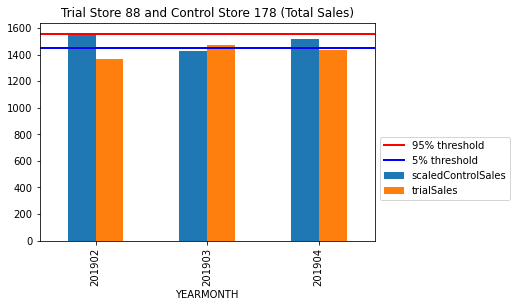

In [115]:
# plots
sales = scaledsales(88, 178).loc[scaledsales(88, 178)['trialPeriod'] == 'trial']
sales.drop(columns=['trialPeriod', 'percentageDiff'], inplace=True)
sales.plot.bar()

mean = (scaledsales(88,178).loc[scaledsales(88,178)['trialPeriod'] == 'trial', 'scaledControlSales']).mean()
std = (scaledsales(88,178).loc[scaledsales(88,178)['trialPeriod'] == 'pre-trial', 'percentageDiff']).std()
thresh95 = mean + (2 * mean * std)
thresh5 = mean - (2 * mean * std)

plt.axhline(y=thresh95, linewidth=2, color='r', label='95% threshold')
plt.axhline(y=thresh5, linewidth=2, color='b', label='5% threshold')
plt.legend(loc='best', bbox_to_anchor=(1.0,0.5))
plt.title('Trial Store 88 and Control Store 178 (Total Sales)')

Trial store 88 showed siginificant decrease in total sales in Feburary.

### Customers

In [116]:
scaledcustomers(88,178)

<ipython-input-82-ffcfc78eba15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledcontrolcustomers['scaledControl_nCustomers'] = scaledcontrolcustomers['nCustomers'] * customersratio(trialstore, controlstore)
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

,scaledControl_nCustomers,trial_nCustomers,trialPeriod,percentageDiff
YEARMONTH,,,,
201807,129.875862,129,pre-trial,0.006744
201808,131.089655,131,pre-trial,0.000684
201809,122.593103,124,pre-trial,0.011476
201810,123.806897,123,pre-trial,0.006517
201811,134.731034,130,pre-trial,0.035115
201812,122.593103,126,pre-trial,0.027790
201901,115.310345,117,pre-trial,0.014653
201902,129.875862,124,trial,0.045242
201903,138.372414,134,trial,0.031599


In [117]:
tvaluecustomers(88,178)

<ipython-input-82-ffcfc78eba15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledcontrolcustomers['scaledControl_nCustomers'] = scaledcontrolcustomers['nCustomers'] * customersratio(trialstore, controlstore)
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

,scaledControl_nCustomers,trial_nCustomers,trialPeriod,percentageDiff,t-value
YEARMONTH,,,,,
201902,129.875862,124,trial,0.045242,2.458627
201903,138.372414,134,trial,0.031599,1.359944
201904,142.013793,128,trial,0.098679,6.761873


<ipython-input-82-ffcfc78eba15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledcontrolcustomers['scaledControl_nCustomers'] = scaledcontrolcustomers['nCustomers'] * customersratio(trialstore, controlstore)
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

Text(0.5, 1.0, 'Trial Store 88 and Control Store 178 (Number of Customers)')

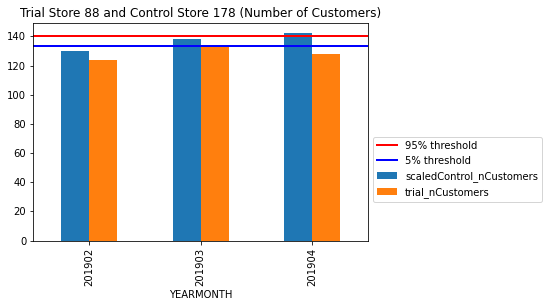

In [118]:
# plots
customers = scaledcustomers(88, 178).loc[scaledcustomers(88, 178)['trialPeriod'] == 'trial']
customers.drop(columns=['trialPeriod', 'percentageDiff'], inplace=True)
customers.plot.bar()

mean = (scaledcustomers(88,178).loc[scaledcustomers(88,178)['trialPeriod'] == 'trial', 'scaledControl_nCustomers']).mean()
std = (scaledcustomers(88,178).loc[scaledcustomers(88,178)['trialPeriod'] == 'pre-trial', 'percentageDiff']).std()
thresh95 = mean + (2 * mean * std)
thresh5 = mean - (2 * mean * std)

plt.axhline(y=thresh95, linewidth=2, color='r', label='95% threshold')
plt.axhline(y=thresh5, linewidth=2, color='b', label='5% threshold')
plt.legend(loc='best', bbox_to_anchor=(1.0,0.5))
plt.title('Trial Store 88 and Control Store 178 (Number of Customers)')

Trial store 88 showed decrease in number of customers in all trial period.